In [154]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [173]:
df17=pd.read_excel('Bases de Apoyo\\Deita17.xlsx')
df18=pd.read_excel('Bases de Apoyo\\Deita18.xlsx')
df19=pd.read_excel('Bases de Apoyo\\Deita19.xlsx')
df20=pd.read_excel('Bases de Apoyo\\Deita20.xlsx')
df21=pd.read_excel('Bases de Apoyo\\Deita21.xlsx')
df22=pd.read_excel('Bases de Apoyo\\Deita22.xlsx')
df=pd.read_excel('Bases de Apoyo\\DeitaSum.xlsx')
df18.fillna(0)
df18=df18[df18['NORTE']!=0.0]
l=[df17,df18,df19,df20,df21,df22]

In [243]:
dfavg = pd.DataFrame()

for i, x in enumerate(l):
    dfavg = pd.concat([dfavg, x], axis=0)

dfavg=dfavg.groupby('CO_IPRESS').mean()


In [189]:
for i,x in enumerate(l):
  x['Partos_vivos']=x['Partos_vivos_CESAREA']+x['Partos_vivos_VAGINAL']
  x['Partos_muertos']=x['Partos_muertos_CESAREA']+x['Partos_muertos_VAGINAL']
  x.drop(['Partos_CESAREA','Partos_VAGINAL','Partos_vivos_CESAREA','Partos_vivos_VAGINAL','Partos_muertos_CESAREA','Partos_muertos_VAGINAL'],axis=1,inplace=True)
  x.drop(['NRO_TOTAL_PACIENTES_CAMAS','NRO_TOTAL_CAMAS','CA_CAMAS','CA_CONSULTORIOS'],axis=1,inplace=True)
  x['Tipo'] = np.where(x['CATEGORIA'].isin(['II-2', 'II-E', 'III-1', 'III-2', 'III-E']), 'hospital', 'posta')


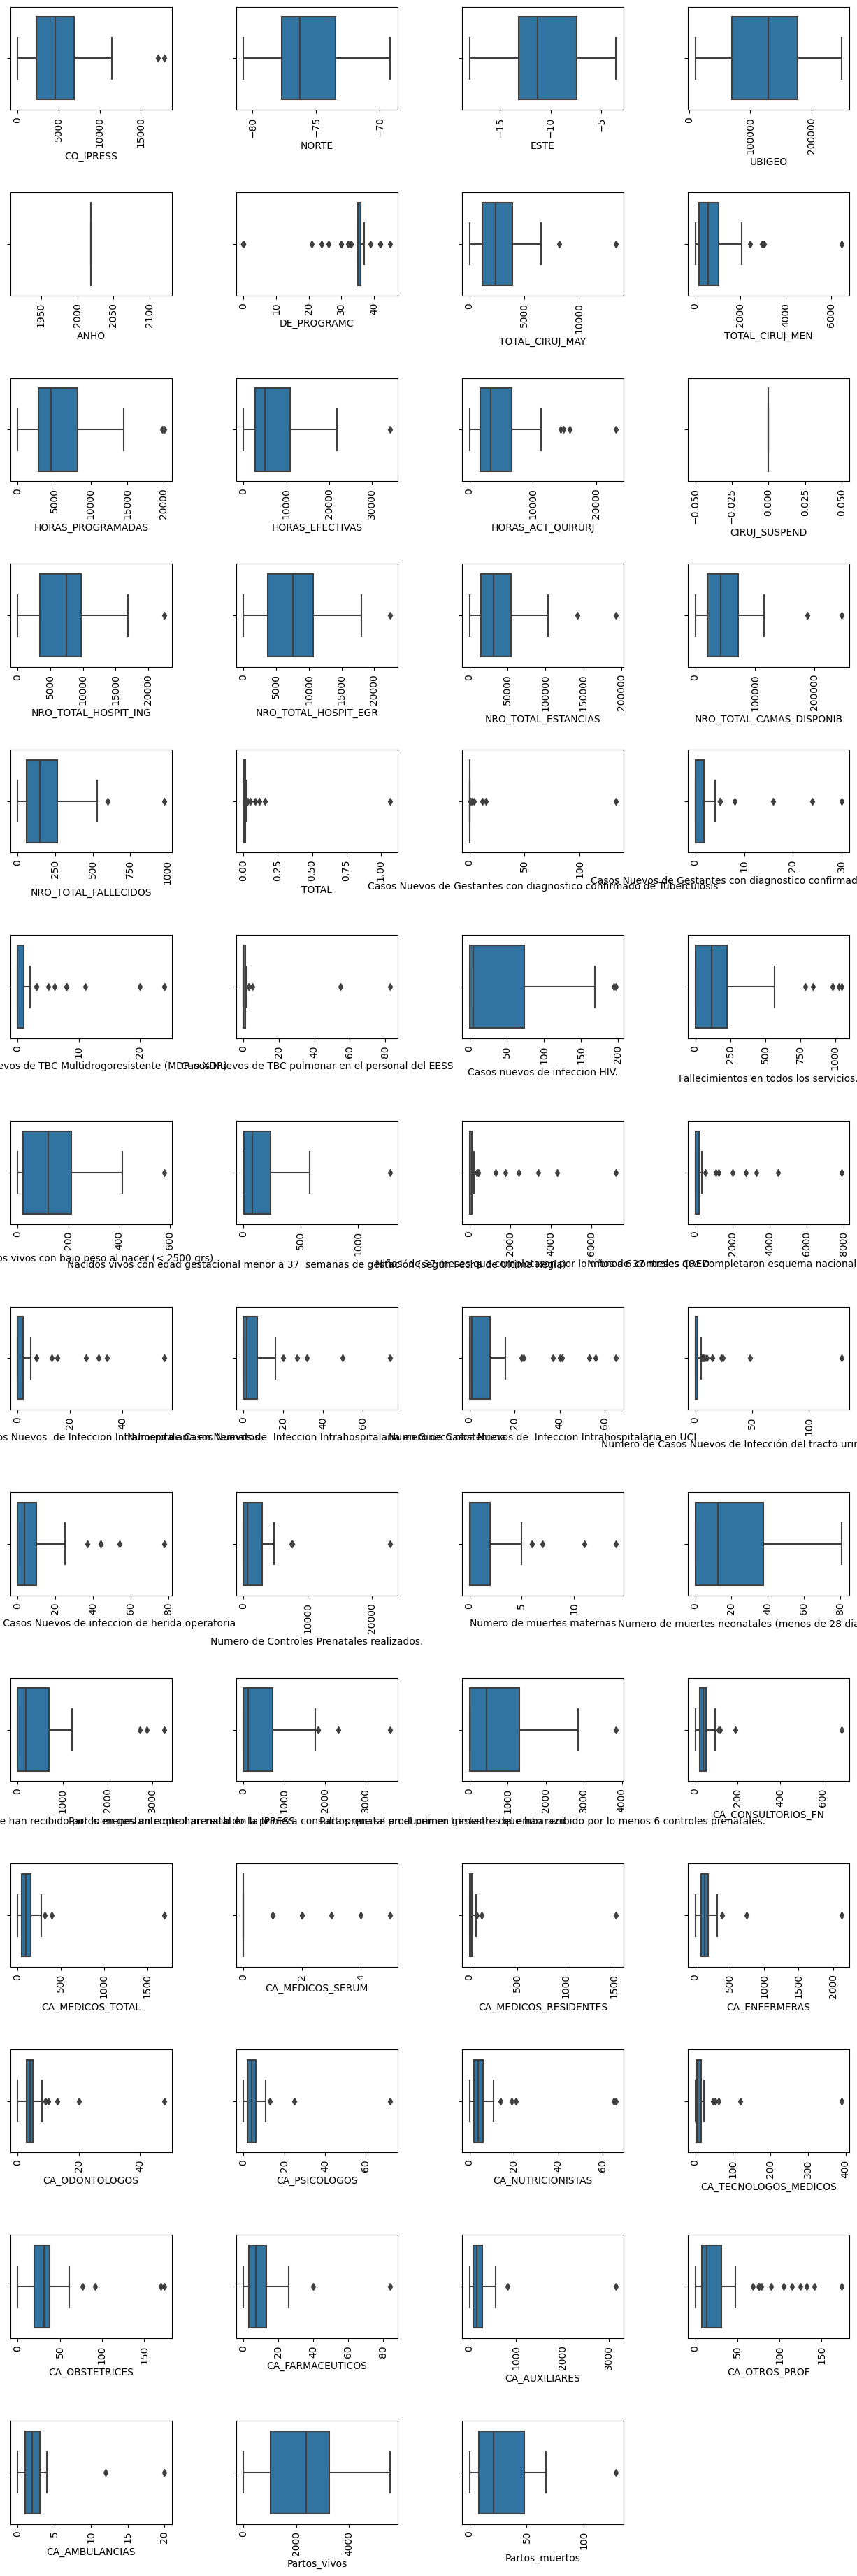

In [188]:
hosp = df19[(df19['CATEGORIA'].isin(['II-2', 'II-E', 'III-1', 'III-2', 'III-E']))]
hosp_numeric = df19.select_dtypes(include='number')

num_cols = 4
num_rows = (len(hosp_numeric.columns) + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
plt.subplots_adjust(hspace=0.8, wspace=0.4, top=5, bottom=2, left=0.1, right=0.9)

for i, col in enumerate(hosp_numeric.columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(x=hosp[col], ax=ax)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

if len(hosp_numeric.columns) % num_cols != 0:
    for i in range(len(hosp_numeric.columns), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])
plt.show()


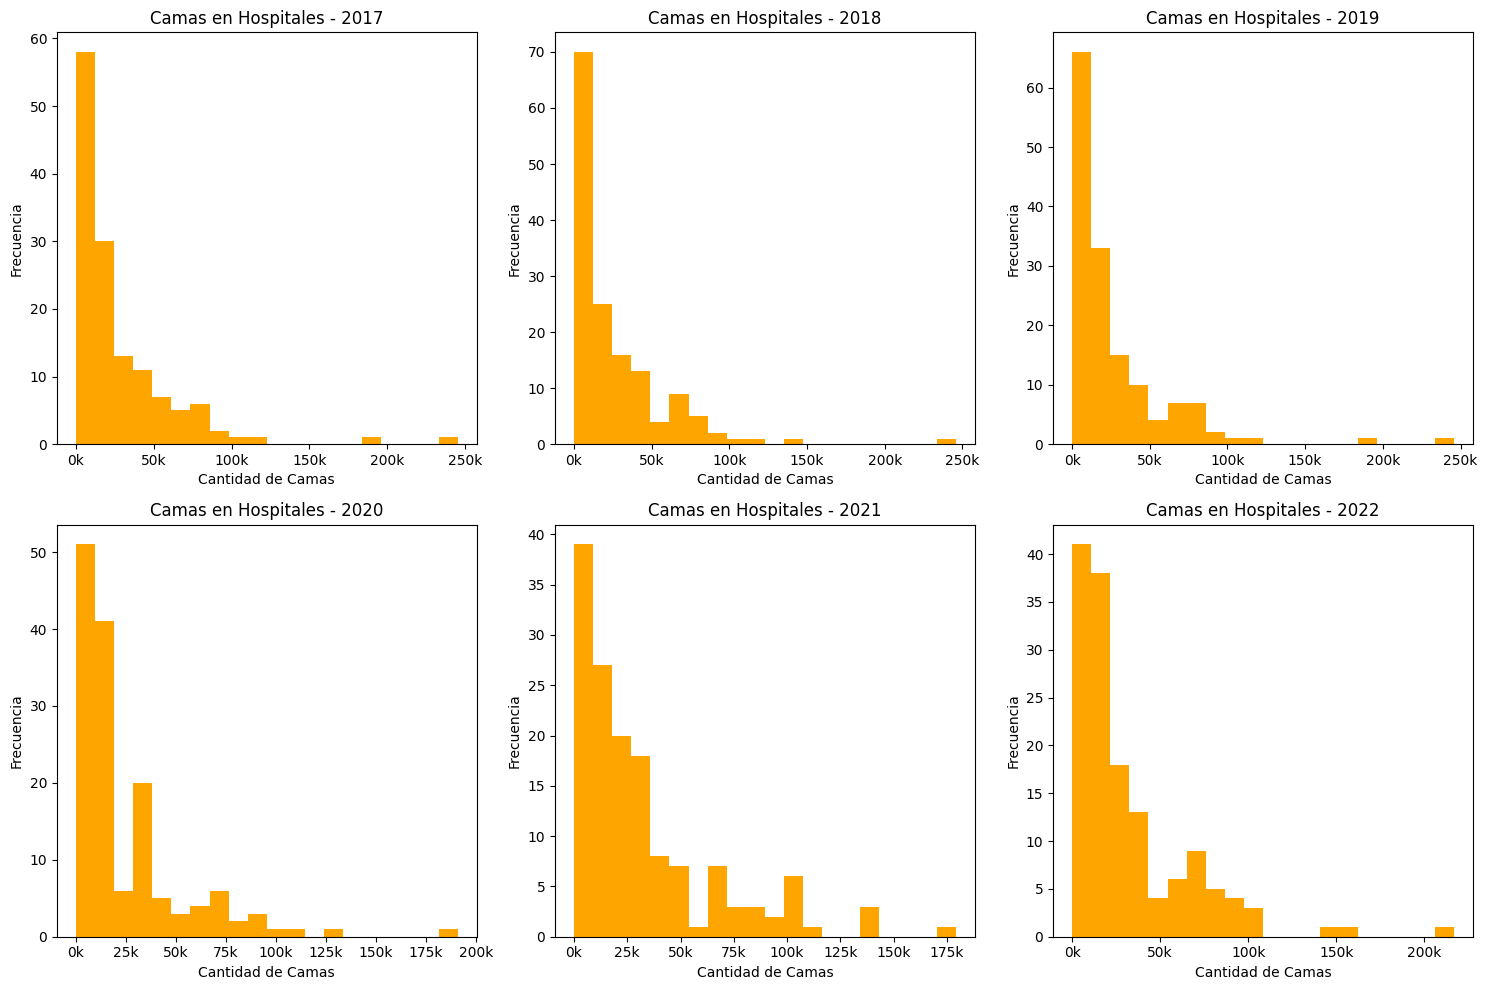

In [270]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, df in enumerate(l):
    hosp = df[(df['CATEGORIA'].isin(['II-1', 'II-2', 'II-E', 'III-1', 'III-2', 'III-E']))]

    # Graficar histograma para hospitales en subplots
    ax = axes[i // num_cols, i % num_cols]
    ax.hist(hosp['NRO_TOTAL_CAMAS_DISPONIB'], bins=20, color='orange')
    ax.set_xlabel('Cantidad de Camas')
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Camas en Hospitales - {2017 + i}')

    # Función para formatear los ticks del eje x en unidades de k (miles)
    formatter = FuncFormatter(lambda x, _: '{:,.0f}k'.format(x * 1e-3))
    ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()  # Ajustar diseño
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, df in enumerate(l):
    hosp = df[(df['CATEGORIA'].isin(['II-1', 'II-2', 'II-E', 'III-1', 'III-2', 'III-E']))]

    # Graficar histograma para hospitales en subplots
    ax = axes[i // num_cols, i % num_cols]
    ax.hist(hosp['CA_ENFERMERAS'], bins=20, color='skyblue')
    ax.set_xlabel('Cantidad de Enfermeras')
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Enfermeras en Hospitales del Peru (II-1 en adelante) - {2017 + i}')

    # Función para formatear los ticks del eje x en unidades de k (miles)
   # formatter = FuncFormatter(lambda x, _: '{:,.0f}k'.format(x * 1e-3))
   # ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()  # Ajustar diseño
plt.show()



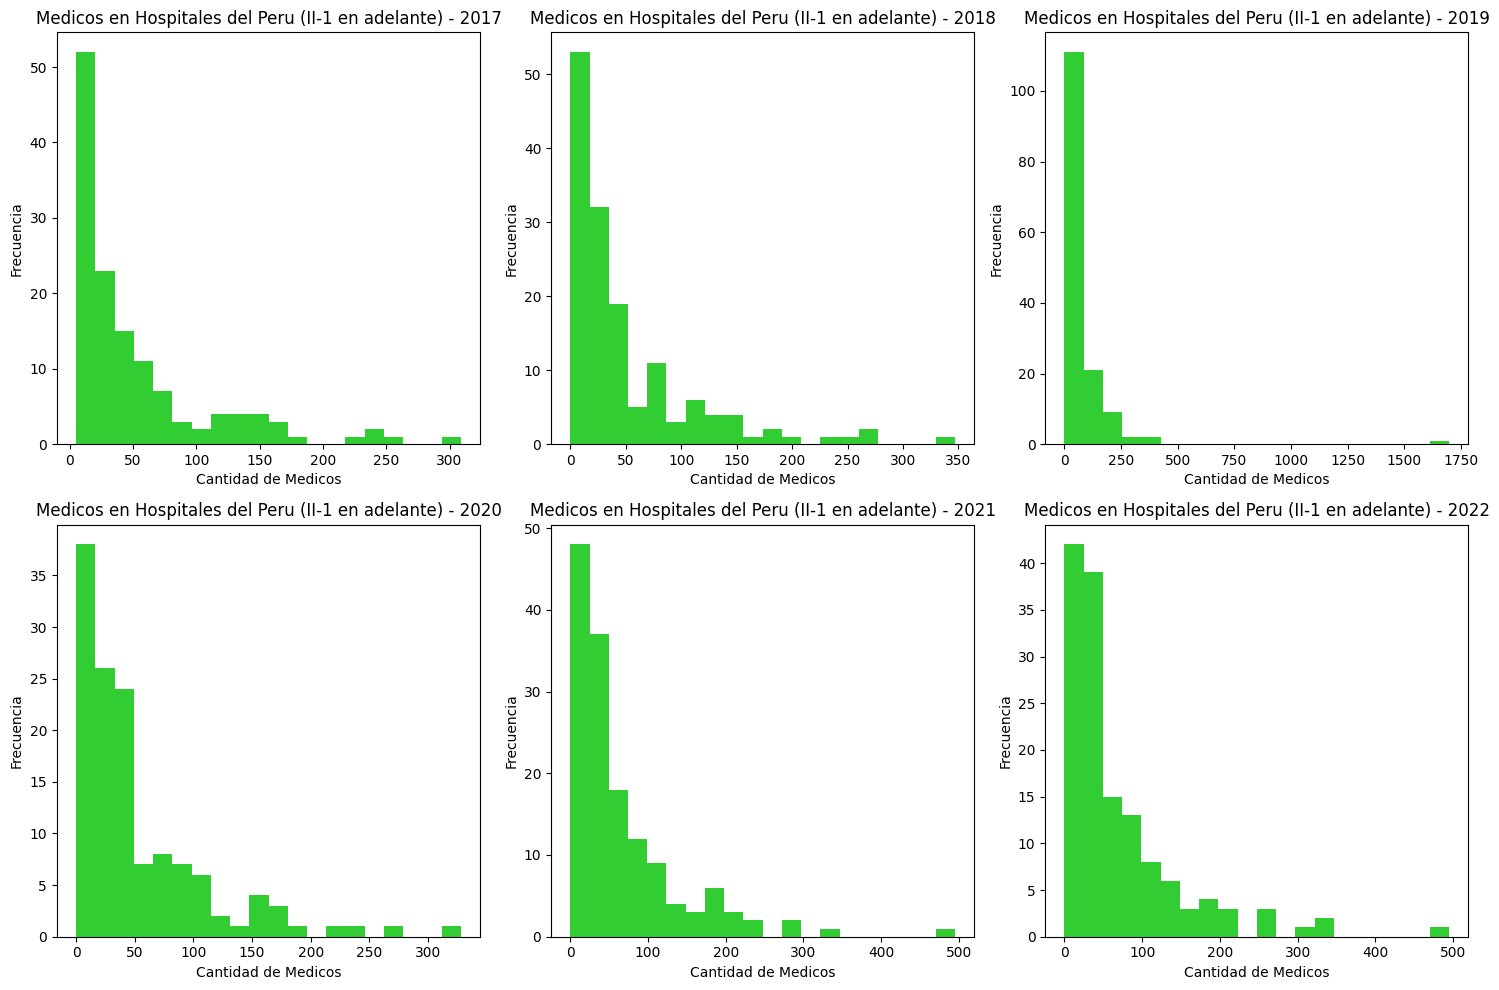

In [276]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, df in enumerate(l):
    hosp = df[(df['CATEGORIA'].isin(['II-1', 'II-2', 'II-E', 'III-1', 'III-2', 'III-E']))]

    # Graficar histograma para hospitales en subplots
    ax = axes[i // num_cols, i % num_cols]
    ax.hist(hosp['CA_MEDICOS_TOTAL'], bins=20, color='limegreen')
    ax.set_xlabel('Cantidad de Medicos')
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Medicos en Hospitales del Peru (II-1 en adelante) - {2017 + i}')

    # Función para formatear los ticks del eje x en unidades de k (miles)
   # formatter = FuncFormatter(lambda x, _: '{:,.0f}k'.format(x * 1e-3))
   # ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()  # Ajustar diseño
plt.show()



In [250]:
dfavg.drop(['NORTE', 'ESTE', 'UBIGEO', 'ANHO', 'CA_MEDICOS_SERUM',
       'CA_MEDICOS_RESIDENTES', 'CA_ENFERMERAS', 'CA_ODONTOLOGOS',
       'CA_PSICOLOGOS', 'CA_NUTRICIONISTAS', 'CA_TECNOLOGOS_MEDICOS',
       'CA_OBSTETRICES', 'CA_FARMACEUTICOS', 'CA_AUXILIARES', 'CA_OTROS_PROF',
       'CA_AMBULANCIAS', 'Casos Nuevos de Gestantes con diagnostico confirmado de Tuberculosis',
       'Casos Nuevos de Gestantes con diagnostico confirmado de infección HIV.',
       'Casos Nuevos de TBC pulmonar en el personal del EESS',
       'Nacidos vivos con edad gestacional menor a 37  semanas de gestación (según Fecha de Ultima Regla)',
       'Niños  de 37 meses que completaron por lo menos 6 controles CRED',
       'Niños de 37 meses que completaron esquema nacional de inmunizaciones',
       'Numero de Casos Nuevos  de Infeccion Intrahospitalaria en Neonatos',
       'Numero de Casos Nuevos de  Infeccion Intrahospitalaria en Gineco obstetricia',
       'Numero de Casos Nuevos de  Infeccion Intrahospitalaria en UCI',
       'Numero de Casos Nuevos de Infección del tracto urinario por cateter',
       'Numero de Casos Nuevos de infeccion de herida operatoria',
       'Numero de Controles Prenatales realizados.',
       'Partos en Gestantes que han recibido por lo menos un control prenatal en la IPRESS',
       'Partos en gestante que han recibido la primera consulta prenatal en el primer trimestre del embarazo',
       'Partos que se producen en gestantes que han recibido por lo menos 6 controles prenatales.','DE_PROGRAMC', 'HORAS_PROGRAMADAS',
       'HORAS_ACT_QUIRURJ', 'CIRUJ_SUSPEND',
       'NRO_TOTAL_HOSPIT_EGR'],axis=1,inplace=True)

In [257]:
dfavg.drop([ 'TOTAL_CIRUJ_MEN',
       'NRO_TOTAL_HOSPIT_ING',
       'NRO_TOTAL_CAMAS_DISPONIB', 'NRO_TOTAL_FALLECIDOS',
       'Nacidos vivos con bajo peso al nacer (< 2500 grs)',
       'Numero de muertes maternas',
       'Numero de muertes neonatales (menos de 28 dias de nacido)',
       ],axis=1,inplace=True)

In [259]:
dfavg.shape

(4391, 11)

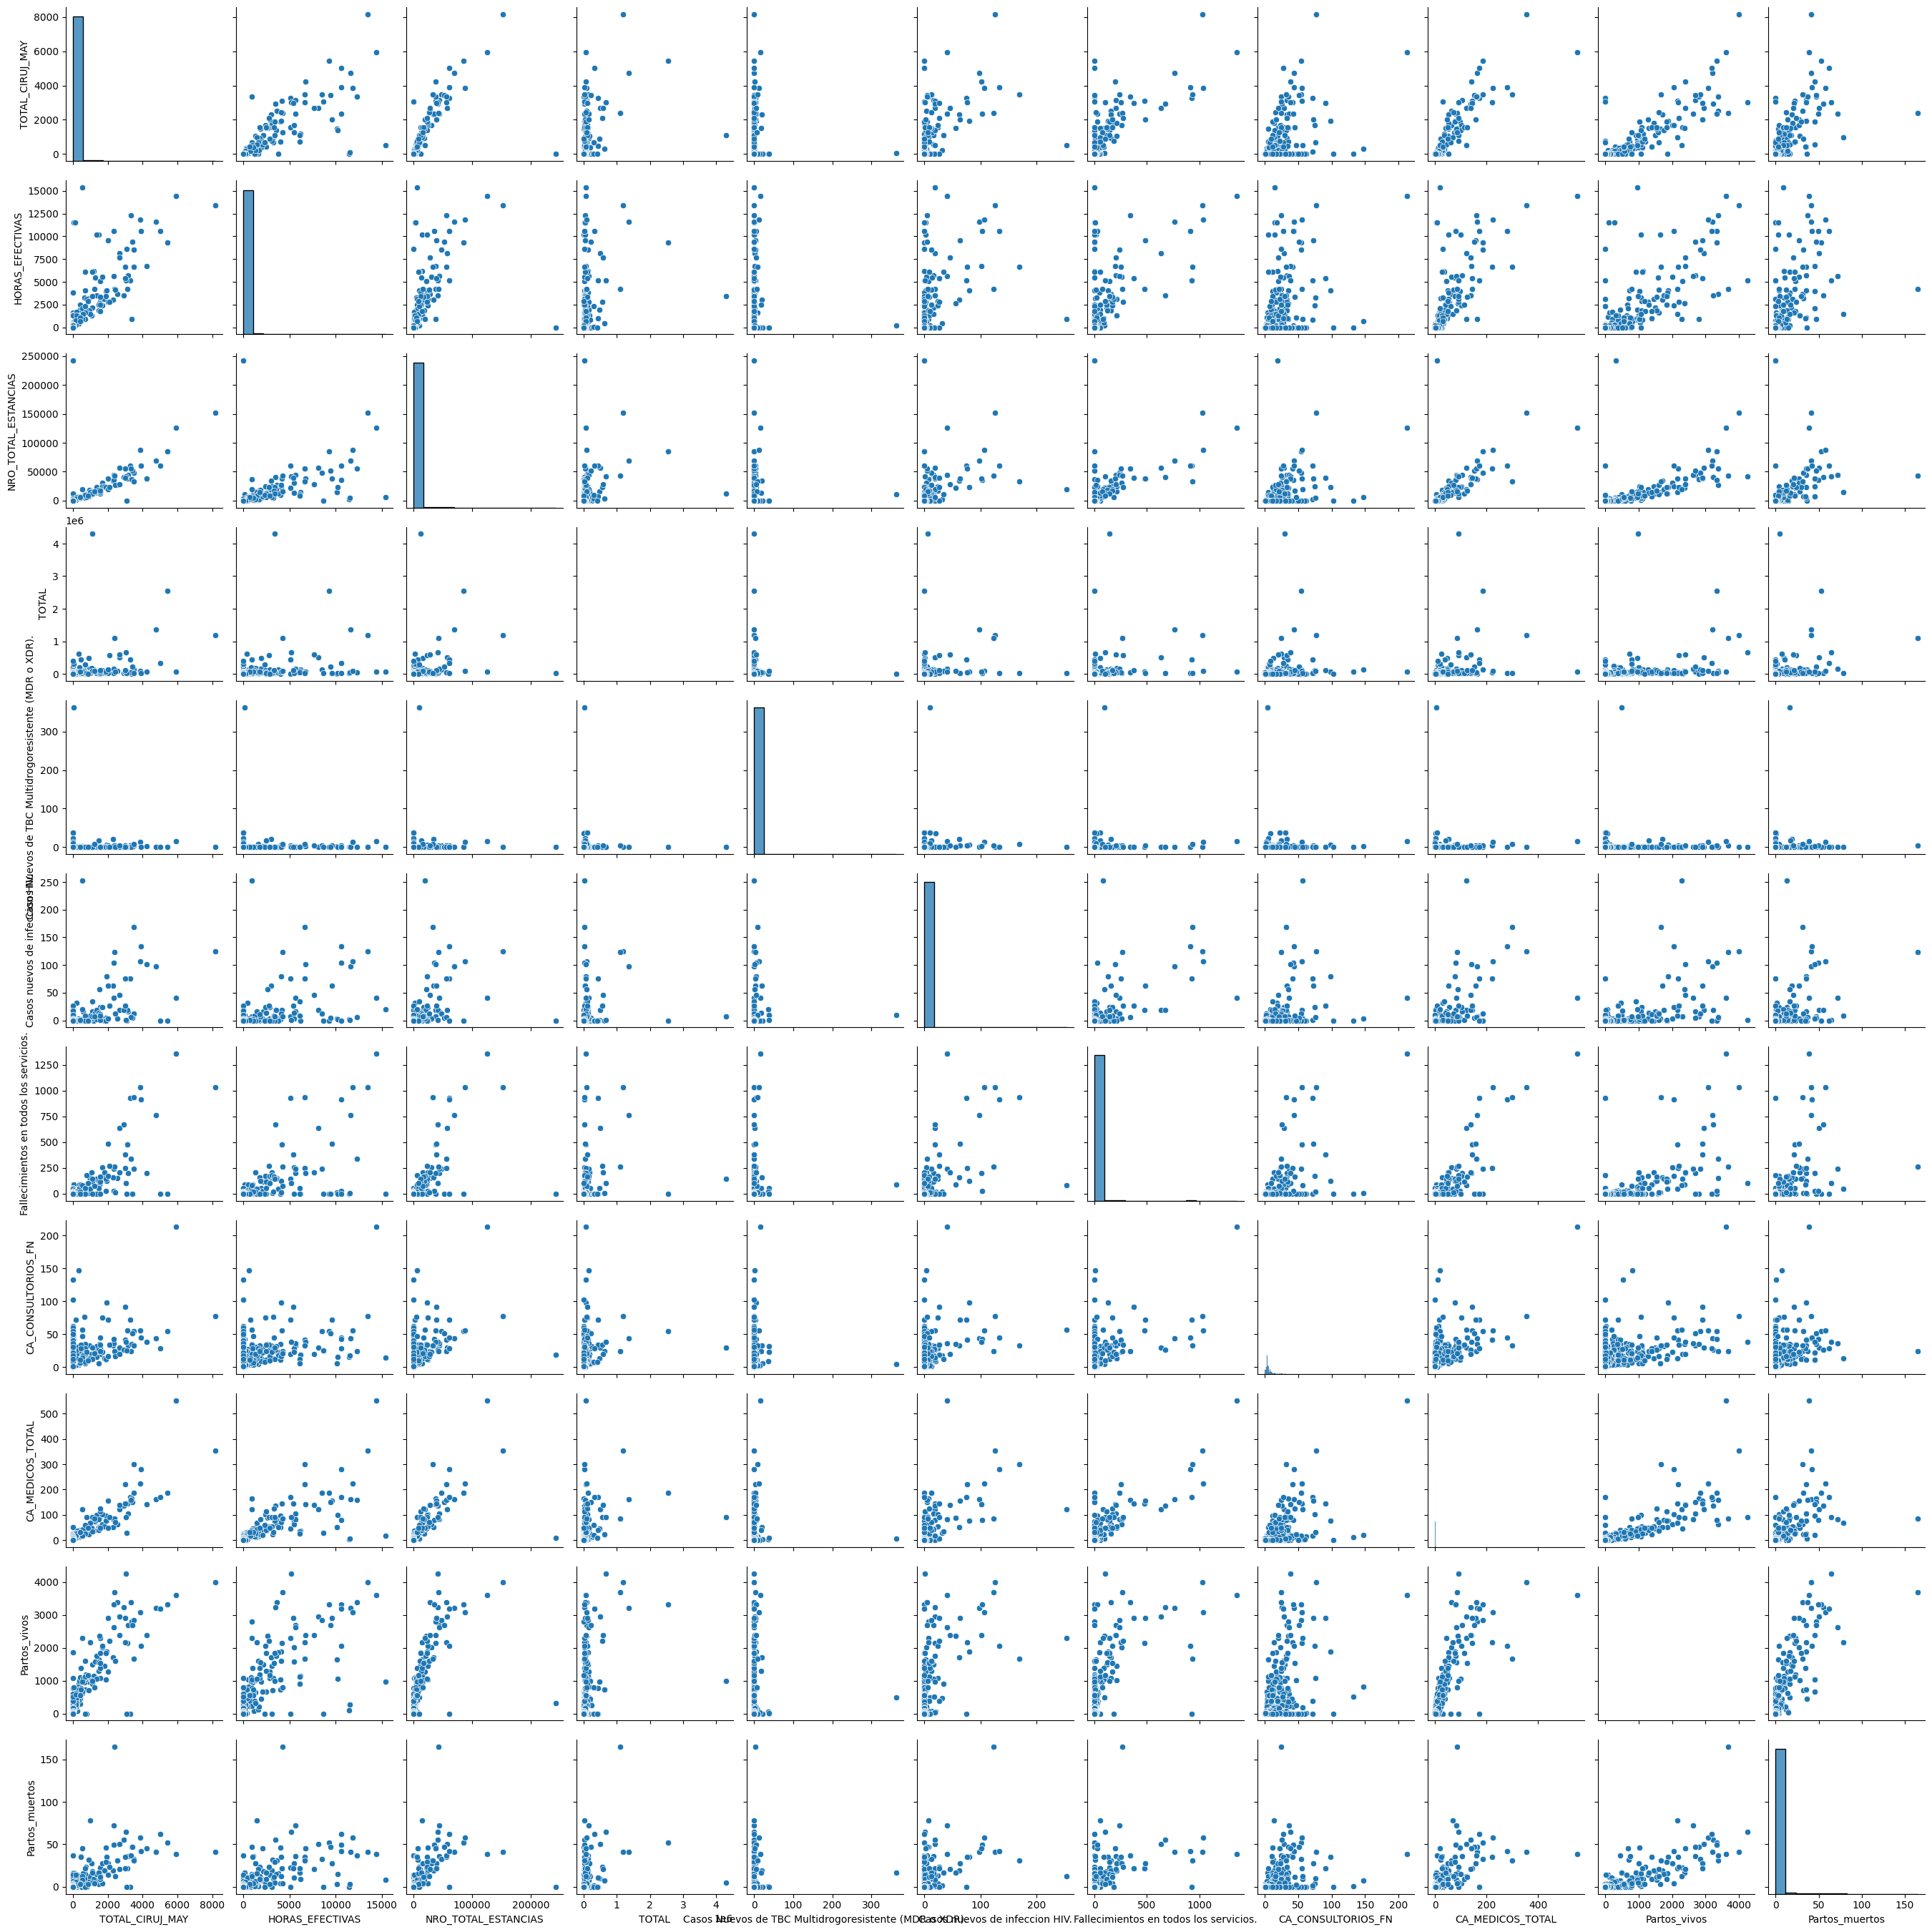

In [260]:
sns.pairplot(dfavg)
plt.show()

In [177]:
df17.columns

Index(['CO_IPRESS', 'NORTE', 'ESTE', 'UBIGEO', 'CATEGORIA', 'ANHO',
       'DE_PROGRAMC', 'TOTAL_CIRUJ_MAY', 'TOTAL_CIRUJ_MEN',
       'HORAS_PROGRAMADAS', 'HORAS_EFECTIVAS', 'HORAS_ACT_QUIRURJ',
       'CIRUJ_SUSPEND', 'NRO_TOTAL_HOSPIT_ING', 'NRO_TOTAL_HOSPIT_EGR',
       'NRO_TOTAL_ESTANCIAS', 'NRO_TOTAL_CAMAS_DISPONIB',
       'NRO_TOTAL_FALLECIDOS', 'TOTAL',
       'Casos Nuevos de Gestantes con diagnostico confirmado de Tuberculosis',
       'Casos Nuevos de Gestantes con diagnostico confirmado de infección HIV.',
       'Casos Nuevos de TBC Multidrogoresistente (MDR o XDR).',
       'Casos Nuevos de TBC pulmonar en el personal del EESS',
       'Casos nuevos de infeccion HIV.',
       'Fallecimientos en todos los servicios.',
       'Nacidos vivos con bajo peso al nacer (< 2500 grs)',
       'Nacidos vivos con edad gestacional menor a 37  semanas de gestación (según Fecha de Ultima Regla)',
       'Niños  de 37 meses que completaron por lo menos 6 controles CRED',
       'Niños 

In [202]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
gpd_peru = gpd.read_file('peru_departamental_simple.geojson')
#gpd_peru['IDDIST'] = gpd_peru['IDDIST'].astype(int)
gpd_peru.head()
#df17['Departamento']

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


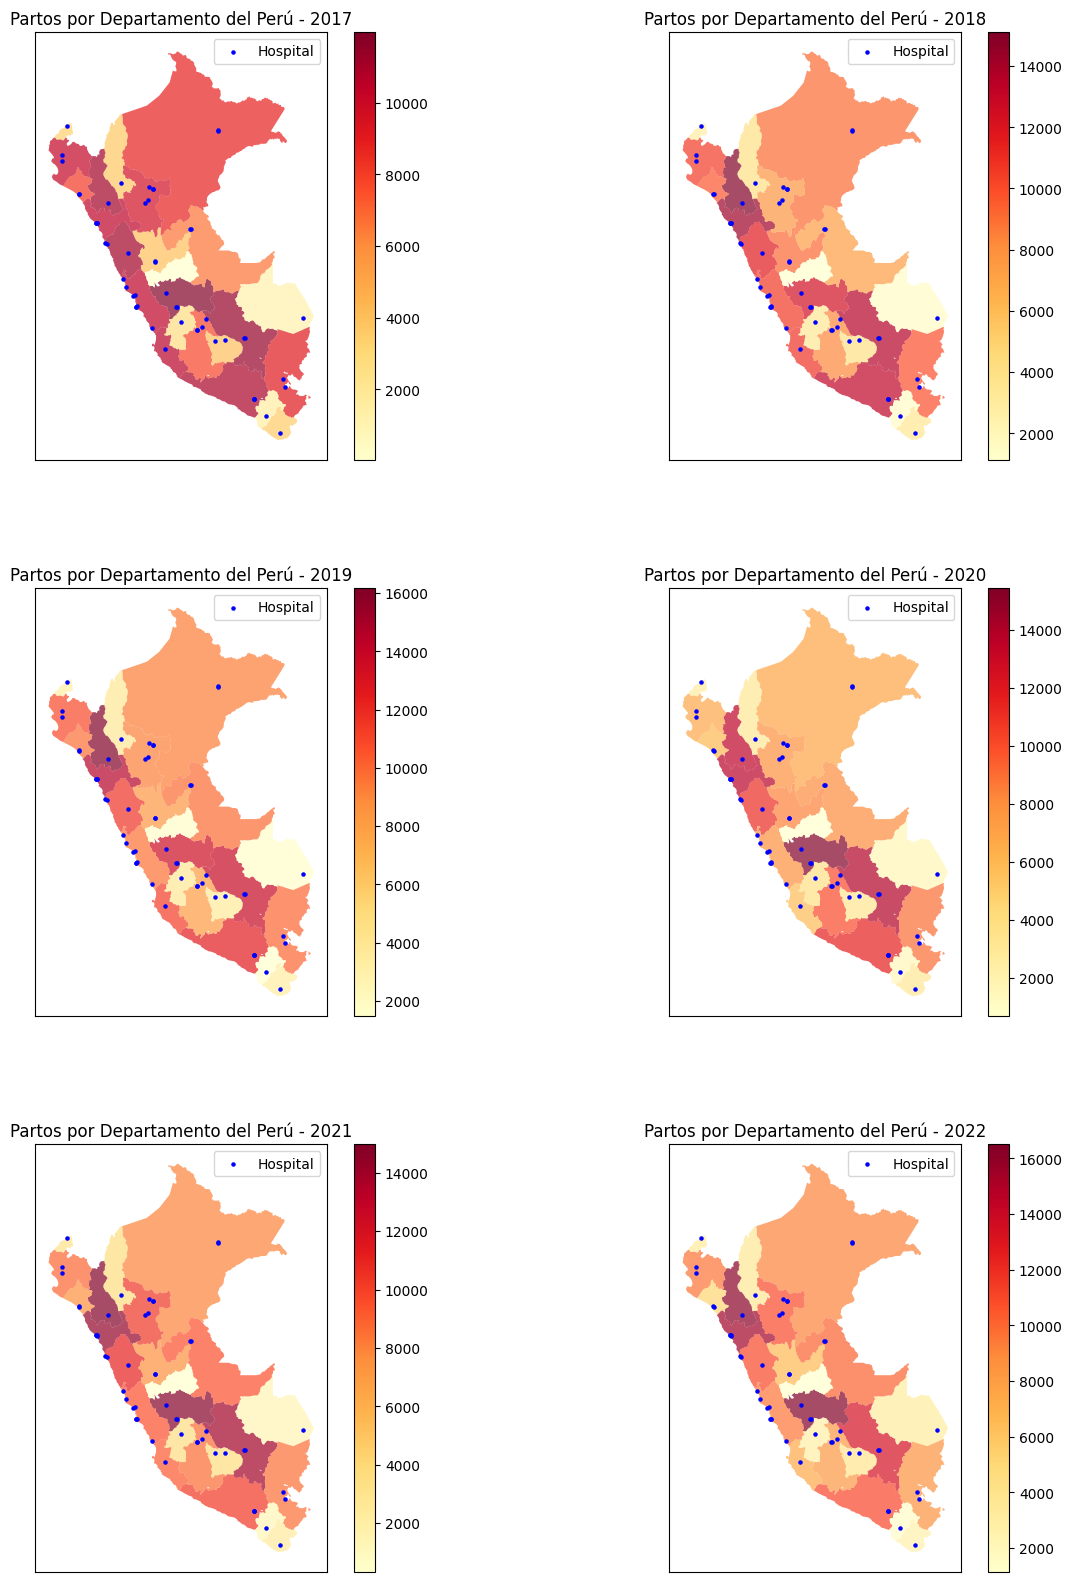

In [261]:
# Create subplots for each department with reduced spacing
num_departments = len(l)
num_cols = 2
num_rows = (num_departments + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
plt.subplots_adjust(hspace=0.3, wspace=0.2)  # Adjust spacing between subplots

for i, (ax, data) in enumerate(zip(axes.flatten(), l)):
    dumdum = data.groupby(['Departamento']).sum().reset_index()
    merged_data = gpd_peru.merge(dumdum, left_on='NOMBDEP', right_on='Departamento')

    merged_data.plot(column='Partos_vivos', ax=ax, legend=True, cmap='YlOrRd', alpha=0.7, markersize=10)

    # Plotting the heatmap
    ax.set_title(f'Partos por Departamento del Perú - {2017 + i}')
    ax.set_yticks([])
    ax.set_xticks([])
    # Plotting hospital locations on top of the heatmap
    hospital_data = data[data['Tipo'] == 'hospital']
    ax.scatter(hospital_data['NORTE'], hospital_data['ESTE'], color='blue', label='Hospital', s=5)

    ax.legend()

# If there are empty subplots, remove them
for i in range(num_departments, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.show()


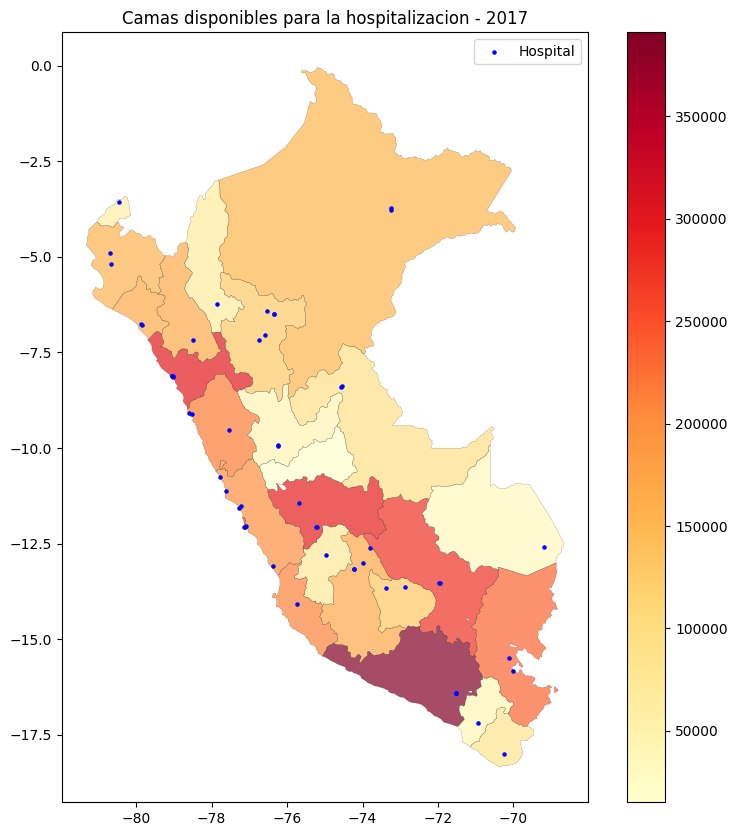

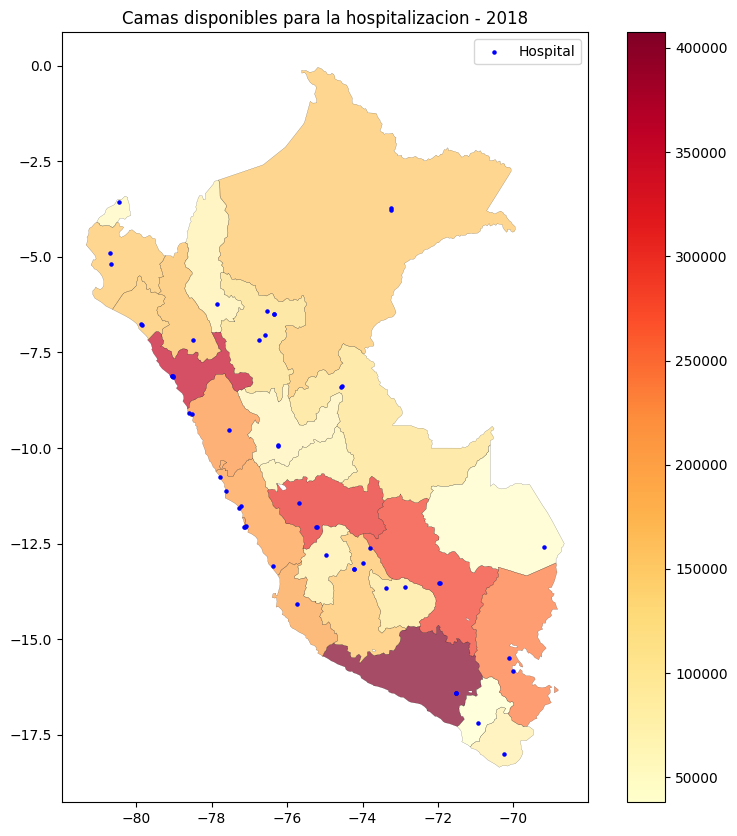

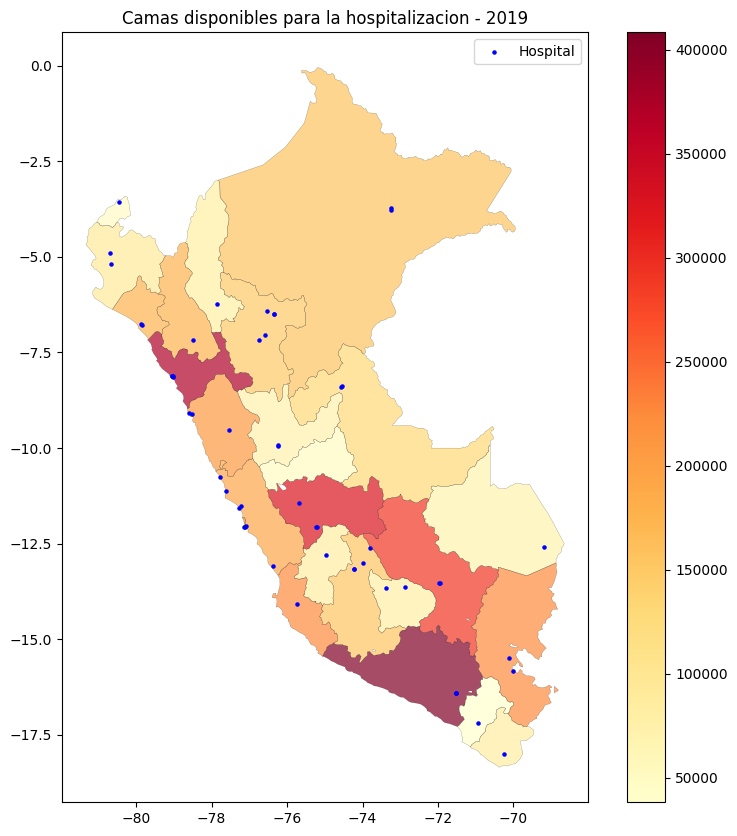

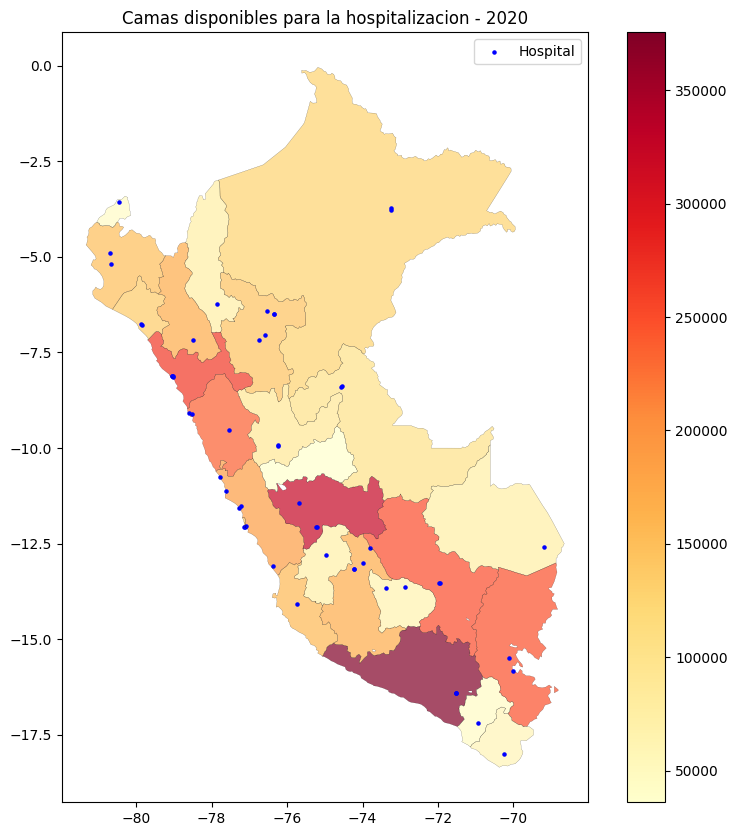

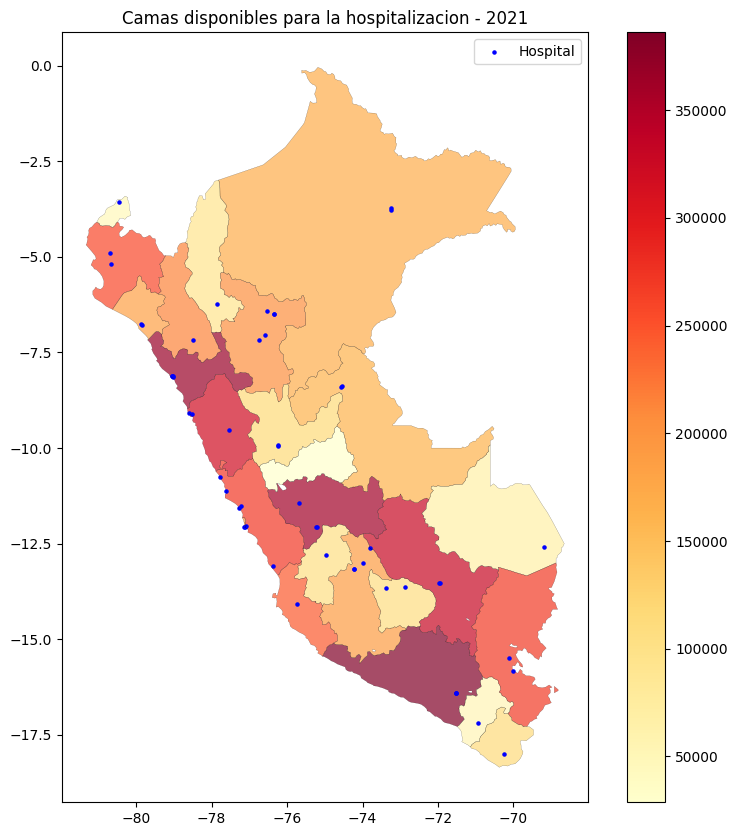

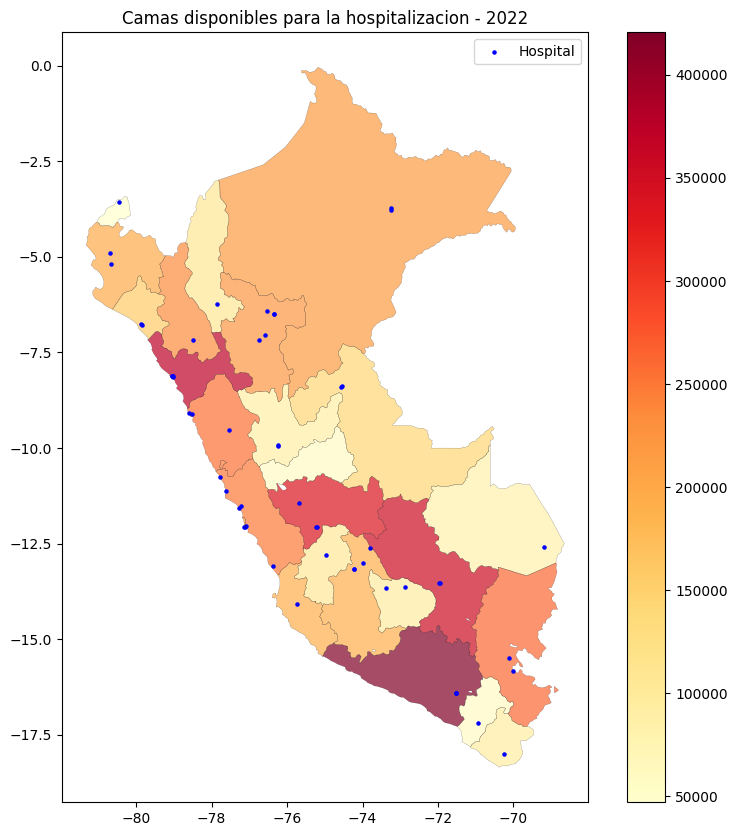

In [215]:
for i, x in enumerate(l):
    dumdum = x.groupby(['Departamento']).sum().reset_index()
    merged_data = gpd_peru.merge(dumdum, left_on='NOMBDEP', right_on='Departamento')

    fig, ax = plt.subplots(figsize=(10, 10))
    gpd_peru.boundary.plot(ax=ax, color='black', linewidth=0.1)

    merged_data.plot(column='NRO_TOTAL_CAMAS_DISPONIB', ax=ax, legend=True, cmap='YlOrRd', alpha=0.7, markersize=10)

    # Plotting the heatmap
    plt.title(f'Camas disponibles para la hospitalizacion - {2017 + i}')

    # Defining colors and labels for legend
    dumdum = x.groupby(['UBIGEO', 'NORTE', 'ESTE', 'Tipo']).sum().reset_index()
    colors = {'hospital': 'blue'}
    labels = {'posta': 'Posta', 'hospital': 'Hospital'}

    # Plotting the locations of points in 'dumdum' on top of the heatmap
    for tipo, color in colors.items():
        df_tipo = dumdum[dumdum['Tipo'] == tipo]
        ax.scatter(df_tipo['NORTE'], df_tipo['ESTE'], color=color, label=labels[tipo], s=5)

    plt.legend()
    plt.show()


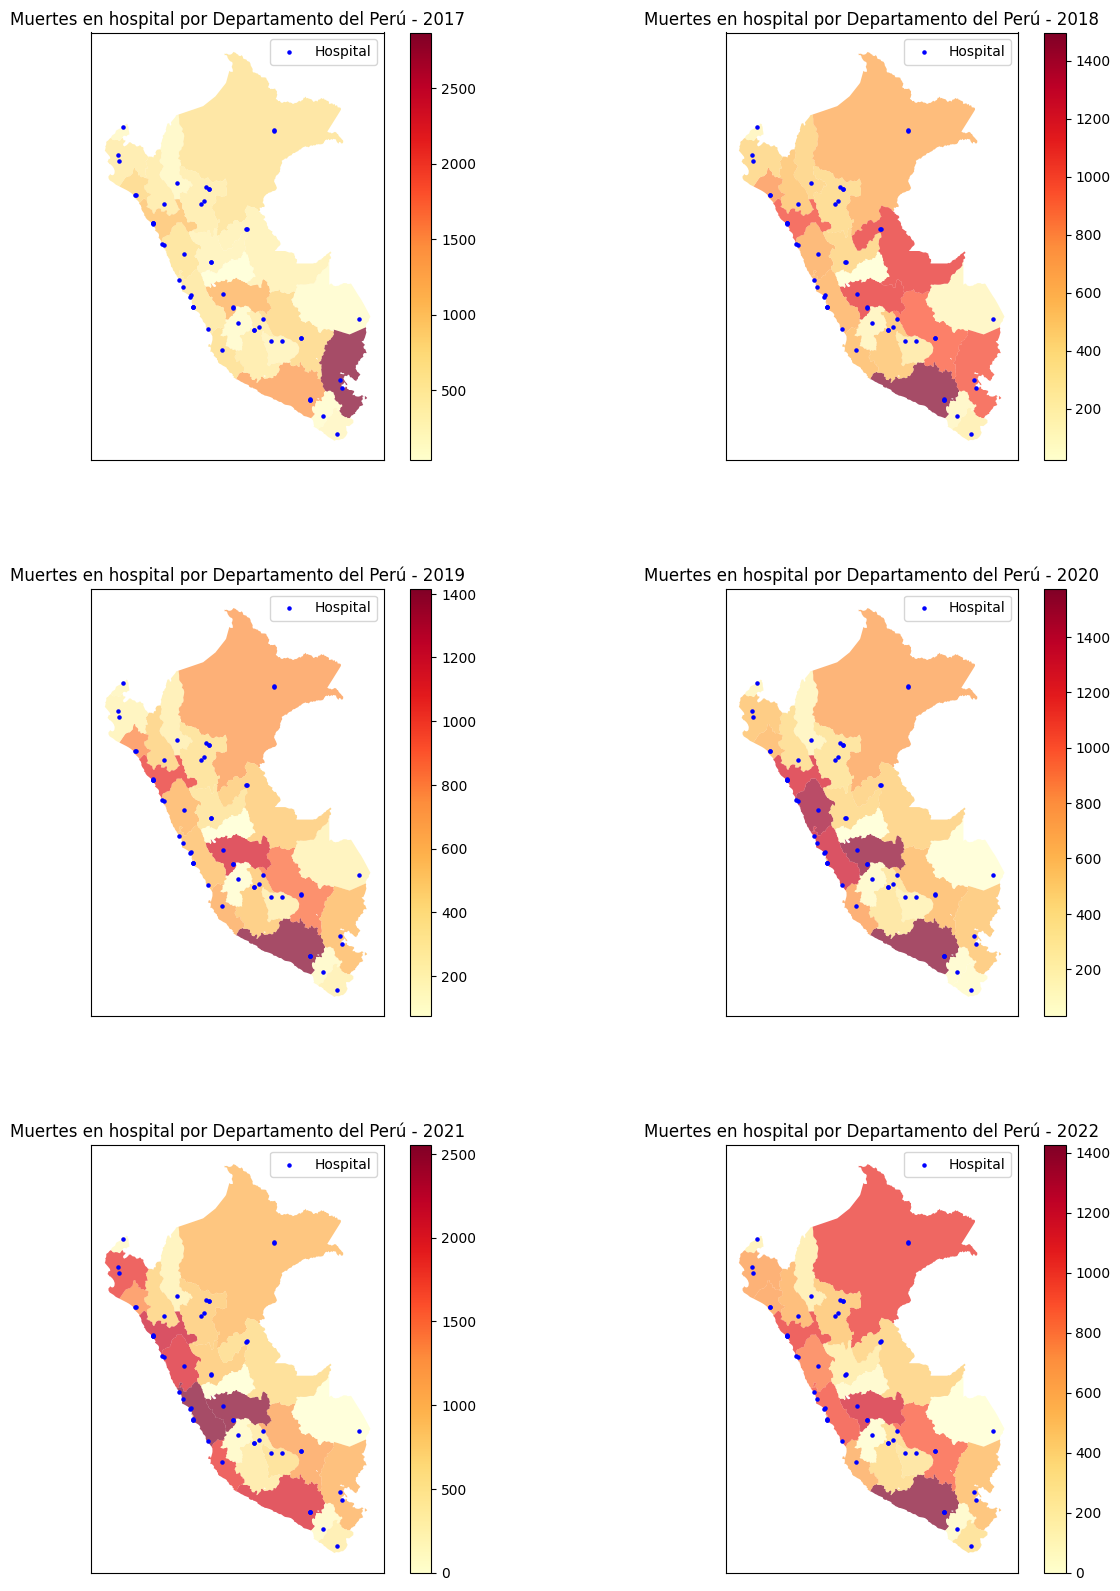

In [262]:
num_departments = len(l)
num_cols = 2
num_rows = (num_departments + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
plt.subplots_adjust(hspace=0.3, wspace=0.2)  # Adjust spacing between subplots

for i, (ax, data) in enumerate(zip(axes.flatten(), l)):
    dumdum = data.groupby(['Departamento']).sum().reset_index()
    merged_data = gpd_peru.merge(dumdum, left_on='NOMBDEP', right_on='Departamento')

    merged_data.plot(column='NRO_TOTAL_FALLECIDOS', ax=ax, legend=True, cmap='YlOrRd', alpha=0.7, markersize=10)

    # Plotting the heatmap
    ax.set_title(f'Muertes en hospital por Departamento del Perú - {2017 + i}')
    ax.set_yticks([])
    ax.set_xticks([])
    # Plotting hospital locations on top of the heatmap
    hospital_data = data[data['Tipo'] == 'hospital']
    ax.scatter(hospital_data['NORTE'], hospital_data['ESTE'], color='blue', label='Hospital', s=5)

    ax.legend()

# If there are empty subplots, remove them
for i in range(num_departments, num_rows * num_cols):
    axes.flatten()[i].axis('off')

plt.show()

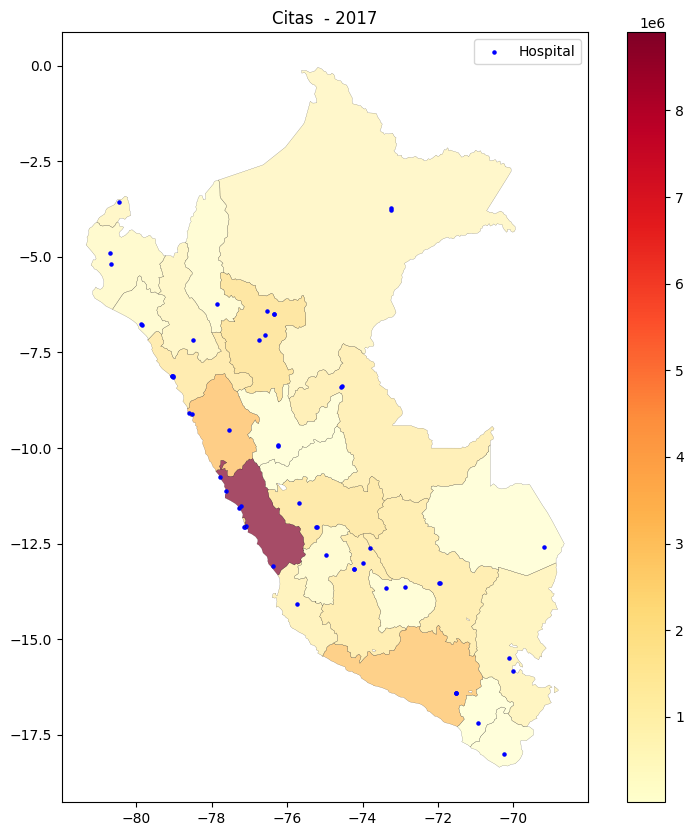

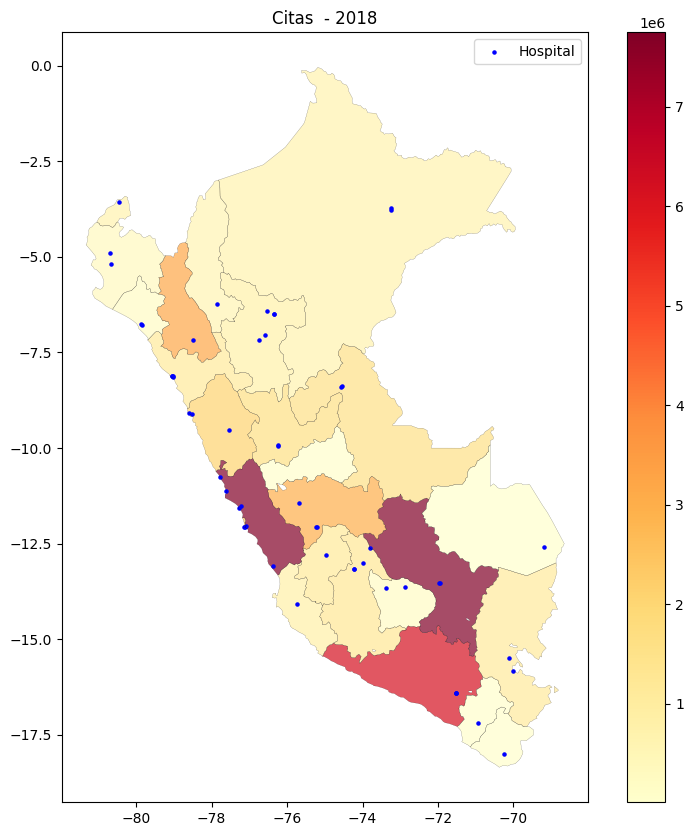

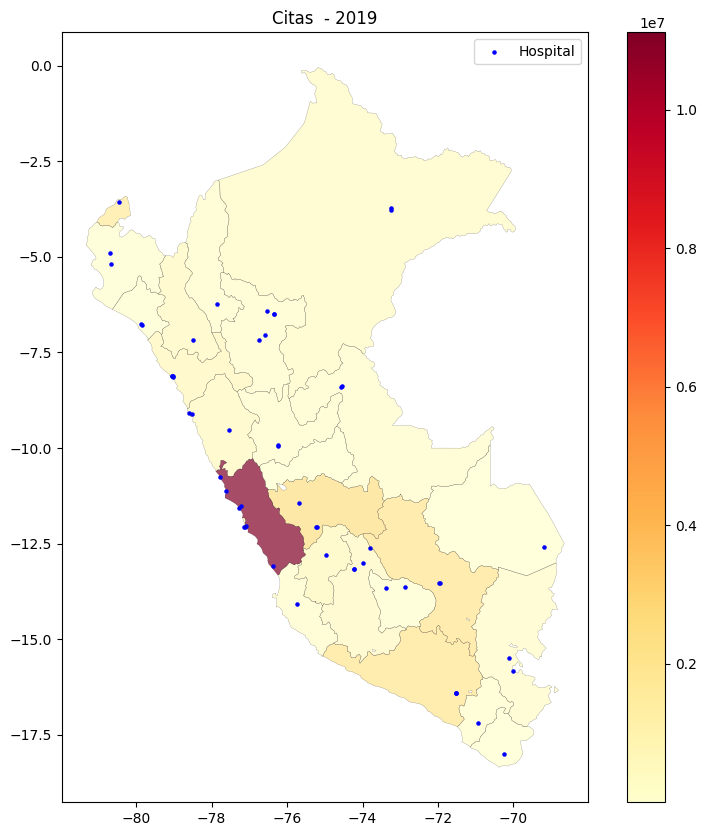

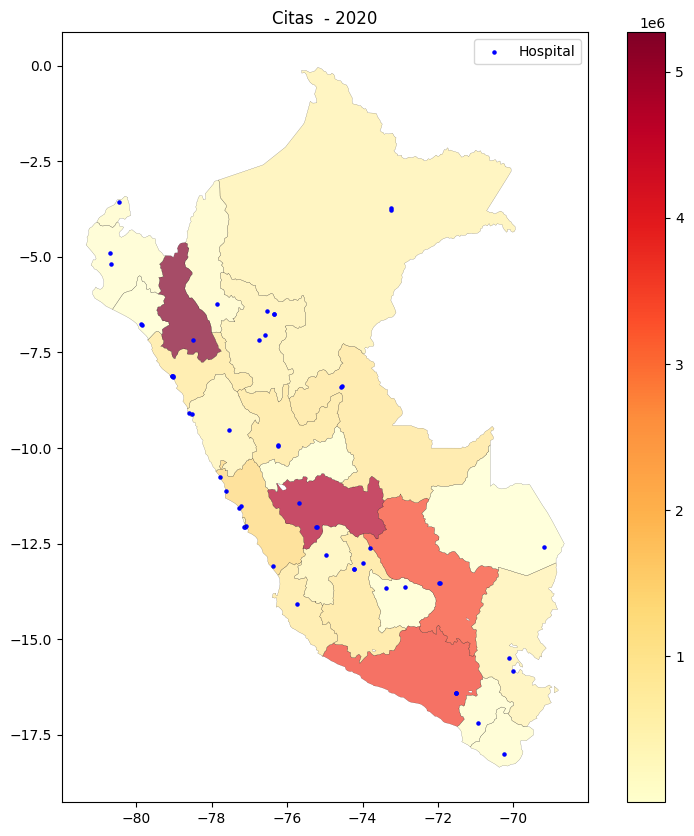

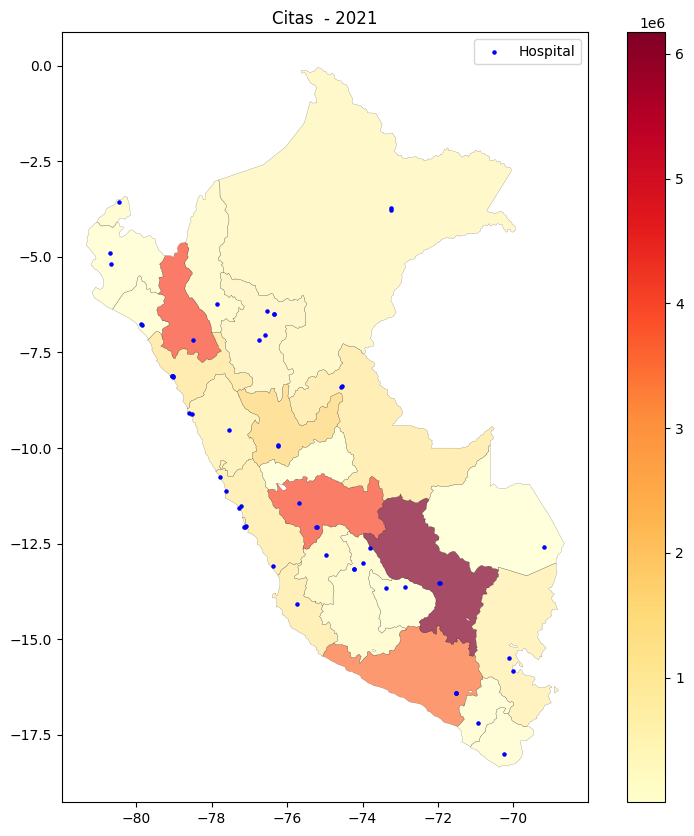

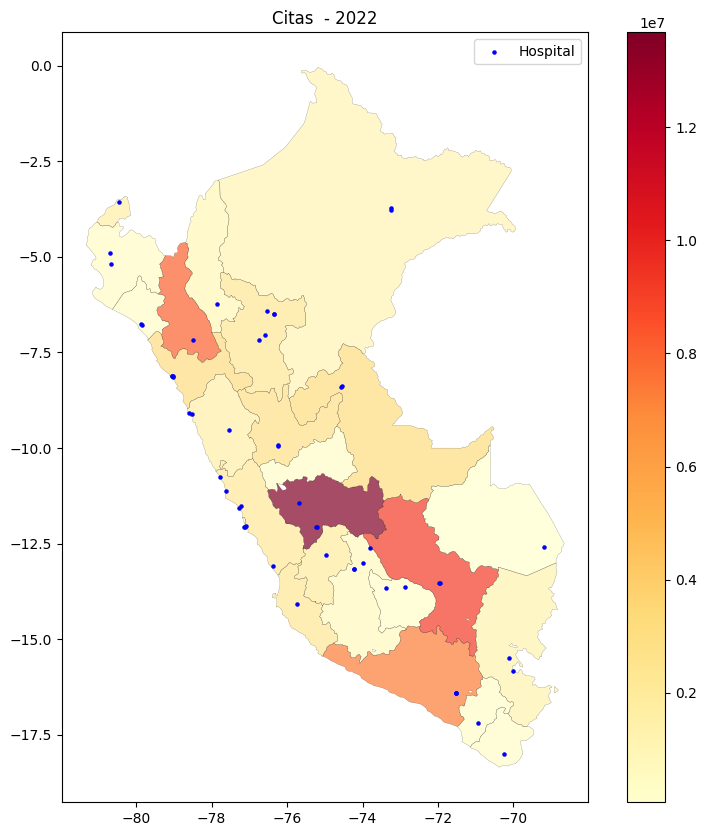

In [217]:
for i, x in enumerate(l):
    dumdum = x.groupby(['Departamento']).sum().reset_index()

    merged_data = gpd_peru.merge(dumdum, left_on='NOMBDEP', right_on='Departamento')

    fig, ax = plt.subplots(figsize=(10, 10))
    gpd_peru.boundary.plot(ax=ax, color='black', linewidth=0.1)

    merged_data.plot(column='TOTAL', ax=ax, legend=True, cmap='YlOrRd', alpha=0.7, markersize=10)

    # Plotting the heatmap
    plt.title(f'Citas  - {2017 + i}')

    # Defining colors and labels for legend
    dumdum = x.groupby(['UBIGEO', 'NORTE', 'ESTE', 'Tipo']).sum().reset_index()
    colors = {'hospital': 'blue'}
    labels = {'posta': 'Posta', 'hospital': 'Hospital'}

    # Plotting the locations of points in 'dumdum' on top of the heatmap
    for tipo, color in colors.items():
        df_tipo = dumdum[dumdum['Tipo'] == tipo]
        ax.scatter(df_tipo['NORTE'], df_tipo['ESTE'], color=color, label=labels[tipo], s=5)

    plt.legend()
    plt.show()